<a href="https://colab.research.google.com/github/linahourieh/Breast-Cancer/blob/main/Breast_Cancer_BRCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/linahourieh/Breast-Cancer/main/BRCA.csv')
df.head(3)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive


In [ ]:
df.shape

(341, 16)

# Clean Variables

In [ ]:
df.isna().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [ ]:
df[df['Patient_ID'].isna() == True]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['Patient_ID'].isna() == True].index

Int64Index([334, 335, 336, 337, 338, 339, 340], dtype='int64')

In [ ]:
df.drop(index=[334, 335, 336, 337, 338, 339, 340], inplace=True)

In [ ]:
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [ ]:
df[df['Date_of_Last_Visit'].isna() == True]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
7,TCGA-A7-A426,50.0,FEMALE,0.672490,1.27900,-0.321070,-0.112390,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,16-May-17,NaN,NaN
22,TCGA-AN-A0FY,55.0,FEMALE,0.330640,0.84757,-0.494660,0.116560,I,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Nov-17,NaN,NaN
99,TCGA-A8-A06O,60.0,FEMALE,0.532420,1.54110,-1.009500,-0.125880,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,11-Dec-17,NaN,NaN
111,TCGA-MS-A51U,44.0,FEMALE,-0.278840,2.16880,-0.462330,0.272200,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,20-Jan-18,NaN,NaN
170,TCGA-AR-A0U2,47.0,FEMALE,0.515580,2.65020,-0.103130,-0.045725,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,29-Jul-18,NaN,Dead
182,TCGA-C8-A1HI,40.0,FEMALE,-1.455300,-0.74177,1.133600,-0.839700,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,07-Sep-18,NaN,NaN
189,TCGA-AO-A03O,69.0,FEMALE,-0.757790,-0.33780,0.561410,0.208300,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Oct-18,NaN,Dead
196,TCGA-C8-A12U,46.0,FEMALE,-0.010999,0.86749,0.281570,-0.545880,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,10-Jun-19,NaN,NaN
206,TCGA-E9-A1NH,71.0,FEMALE,0.394090,1.70540,0.035642,1.441000,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,26-Nov-18,NaN,NaN
219,TCGA-C8-A12X,62.0,FEMALE,0.649340,1.81680,0.279260,0.132280,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,20-Jun-19,NaN,NaN


In [ ]:
from sklearn.impute import KNNImputer

df['Patient_Status_map'] = df['Patient_Status'].map({'Alive':1, 'Dead':0})
imputer1 = KNNImputer(n_neighbors=2, weights="uniform").fit(df[['Patient_Status_map']])
df['Patient_Status'] = imputer1.transform(df[['Patient_Status_map']])
print(df['Patient_Status'])

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
329    0.0
330    0.0
331    0.0
332    0.0
333    0.0
Name: Patient_Status, Length: 334, dtype: float64


In [ ]:
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status         0
Patient_Status_map    13
dtype: int64

In [ ]:
df.drop(columns=['Patient_Status_map'], inplace=True)

# Feature Engineering

In [ ]:
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])

In [ ]:
df['Recovery_Period'] = df['Date_of_Last_Visit'] - df['Date_of_Surgery']

In [ ]:
df['Recovery_Period'] = df['Recovery_Period'].dt.days

In [ ]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status         0
Recovery_Period       17
dtype: int64

In [ ]:
imputer1 = KNNImputer(n_neighbors=5, weights="uniform").fit(df[['Recovery_Period']])
df['Recovery_Period'] = imputer1.transform(df[['Recovery_Period']])
print(df['Recovery_Period'])

0      155.0
1      562.0
2      274.0
3      168.0
4      782.0
       ...  
329     90.0
330    124.0
331    434.0
332    456.0
333    421.0
Name: Recovery_Period, Length: 334, dtype: float64


In [ ]:
df['Recovery_Period'] = pd.to_timedelta(df['Recovery_Period'], unit='D')

In [ ]:
df['Date_of_Last_Visit']= df['Recovery_Period'] + df['Date_of_Surgery']

In [ ]:
df.isna().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
Recovery_Period       0
dtype: int64

# Visualization

In [ ]:
import matplotlib.pyplot as plt


#define data
data = df['Tumour_Stage']
labels = list(df['Tumour_Stage'].unique())

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

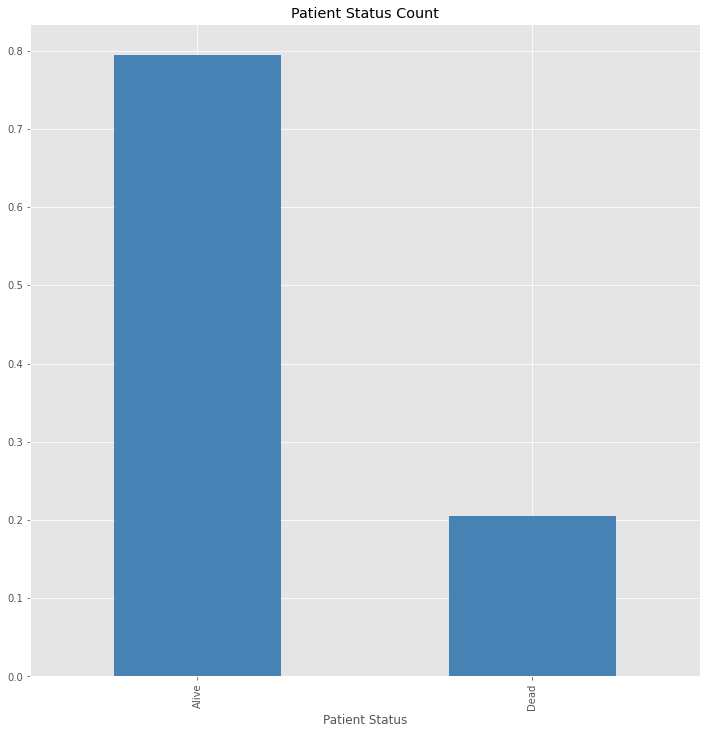

In [ ]:
# generate plot
df['Patient_Status'].value_counts(normalize=True).plot(kind='bar', figsize=(12, 12), color='steelblue')
plt.xlabel('Patient Status')
plt.title('Patient Status Count')

plt.show()

In [ ]:
contigency= pd.crosstab(df['Patient_Status'],df['Surgery_type'])
contigency

Surgery_type,Lumpectomy,Modified Radical Mastectomy,Other,Simple Mastectomy
Patient_Status,,,,
Alive,57,72,73,53
Dead,9,20,25,12


In [ ]:
contigency.iloc[0]/contigency.iloc[1]

Surgery_type
Lumpectomy                     6.333333
Modified Radical Mastectomy    3.600000
Other                          2.920000
Simple Mastectomy              4.416667
dtype: float64

In [ ]:
contigency_pct= pd.crosstab(df['Patient_Status'],df['Surgery_type'],normalize=True)
contigency_pct

Surgery_type,Lumpectomy,Modified Radical Mastectomy,Other,Simple Mastectomy
Patient_Status,,,,
Alive,0.177570,0.224299,0.227414,0.165109
Dead,0.028037,0.062305,0.077882,0.037383


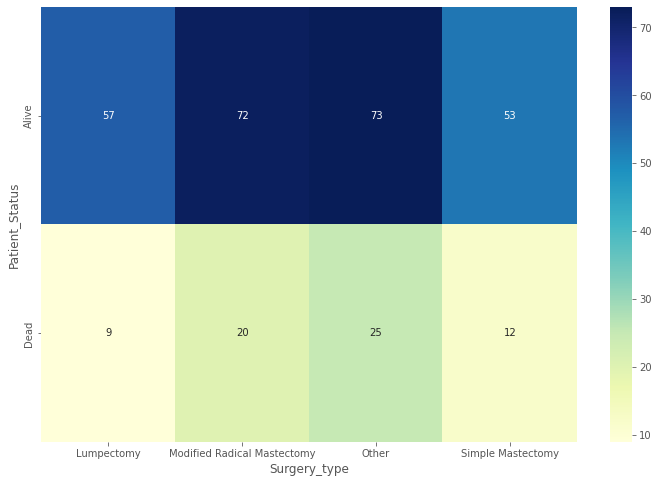

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [ ]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)
p

0.30048934106855263

The p-value is 37.67% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that Smokers and Gender are independent. 

In [ ]:
df['Surgery_type'].unique()

array(['Modified Radical Mastectomy', 'Lumpectomy', 'Other',
       'Simple Mastectomy', nan], dtype=object)

In [ ]:
df['Surgery_type'].value_counts()

Other                          105
Modified Radical Mastectomy     96
Simple Mastectomy               67
Lumpectomy                      66
Name: Surgery_type, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Patient_ID          334 non-null    object         
 1   Age                 334 non-null    float64        
 2   Gender              334 non-null    object         
 3   Protein1            334 non-null    float64        
 4   Protein2            334 non-null    float64        
 5   Protein3            334 non-null    float64        
 6   Protein4            334 non-null    float64        
 7   Tumour_Stage        334 non-null    object         
 8   Histology           334 non-null    object         
 9   ER status           334 non-null    object         
 10  PR status           334 non-null    object         
 11  HER2 status         334 non-null    object         
 12  Surgery_type        334 non-null    object         
 13  Date_of_Surgery     334 non-null   

In [ ]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status', 'Recovery_Period'],
      dtype='object')

In [ ]:
m = df.describe()
m

,Age,Protein1,Protein2,Protein3,Protein4,Recovery_Period
count,334.000000,334.000000,334.000000,334.000000,334.000000,317
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819,447 days 18:37:28.580441640
std,12.961212,0.563588,0.911637,0.585175,0.629055,386 days 06:42:25.907759572
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500,0 days 00:00:00
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090,189 days 00:00:00
50%,58.000000,0.006129,0.992805,-0.173180,0.041768,372 days 00:00:00
75%,68.000000,0.343598,1.627900,0.278353,0.425630,595 days 00:00:00
max,90.000000,1.593600,3.402200,2.193400,1.629900,3019 days 00:00:00
